In [1]:
from GNNTrain import train
from GraphSageModel import GNN7L_Sage
from CreateGraph import create_graph_from_PPI
from CreateDataset import get_dataset_from_graph

import pandas as pd
import seaborn as sn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn.conv import SAGEConv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
graph_path = create_graph_from_PPI('Datasets/BIOGRID-ORGANISM-Homo_sapiens-4.4.206.tab3.txt', 'C0006142', 'grafo_prova_v2')
graph_path

[+] Reading PPI...ok
[+] Creating the graph...ok
	[+] Added 19764 nodes
	[+] Added 682198 edges
[+] Removing self loops...ok
	[+] 19764 nodes
	[+] 678932 edges
[+] Taking the LCC...ok
	[+] 19761 nodes
	[+] 678932 edges
[+] Adding NeDBIT features...ok
[+] Saving graph to path: Graphs/grafo_prova_v2.gml
[i] Elapsed time: 47.881


'Graphs/grafo_prova_v2.gml'

In [3]:
dataset = get_dataset_from_graph(graph_path, 'C0006142')
dataset

[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 36.046


Data(edge_index=[2, 1357864], x=[19761, 6], y=[19761], num_classes=5, train_mask=[19761], test_mask=[19761], val_mask=[19761])

  0%|          | 0/11 [00:00<?, ?it/s]

[Epoch: 0000] train loss: 288.6915, train acc: 0.2379, val loss: 135.1217, val acc: 0.2368  (best train acc: 0.2379, best val acc: 0.2368, best train loss: 288.6915  @ epoch 0 )
[Epoch: 0010] train loss: 33.4240, train acc: 0.2580, val loss: 9.3684, val acc: 0.3089  (best train acc: 0.2580, best val acc: 0.3089, best train loss: 33.4240  @ epoch 10 )


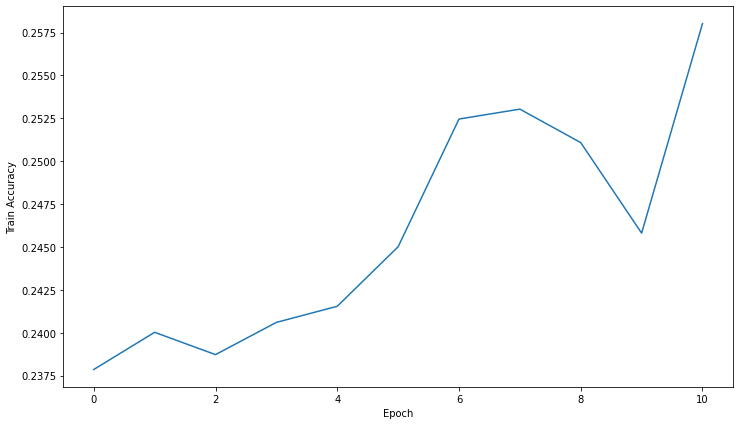

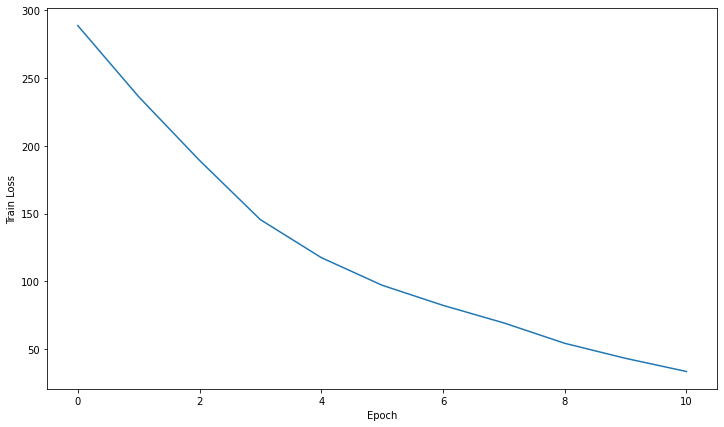

c:\Users\pmaur\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pmaur\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pmaur\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pmau

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.00      0.00      0.00       703
           2       0.26      0.99      0.41       702
           3       0.07      0.00      0.01       703
           4       0.99      0.30      0.46       702

    accuracy                           0.31      2964
   macro avg       0.26      0.26      0.18      2964
weighted avg       0.31      0.31      0.21      2964



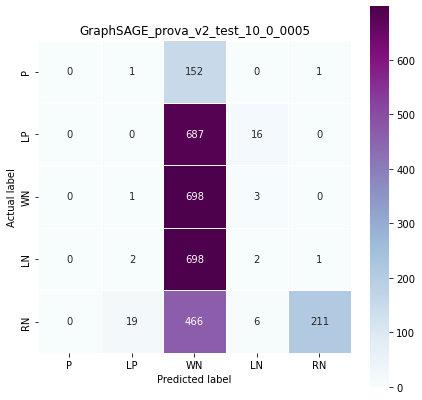

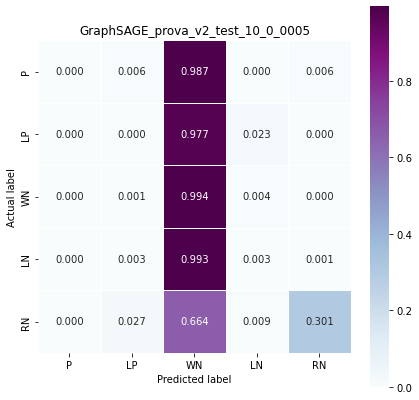

In [4]:
lr              = 0.001
epochs          = 10
weight_decay    = 0.0005

classes         = ['P', 'LP', 'WN', 'LN', 'RN']
gnn_model = GNN7L_Sage(dataset).to(device)
pred = train(gnn_model, dataset, epochs, lr, weight_decay, classes, 'GraphSAGE_prova_v2_test')